In [41]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import campaign_data
import campaign_plots
import seaborn as sns
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 10,
    "legend.fontsize": 10,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

# LOAD CPI DATA

In [3]:
c = campaign_data.CPI()
c.process_campaigns()
c.make_df()
c.remove_baddata()

/network/rit/lab/sulialab/share/IPAS/ipas/CPI/campaign_data.py:122: RuntimeWarning: invalid value encountered in true_divide
  / np.array(self.concat(self.a)),


In [4]:
c.df_CPI.head()

,Campaign,Classification,Area Ratio,Contour Area,a,c,Aspect Ratio,Dmax,Complexity
0,AIRS II,compact_irreg,0.602,457127.0,0.000065,0.000052,0.809344,0.000129,0.525
1,AIRS II,compact_irreg,0.529,299689.5,0.000071,0.000047,0.666662,0.000142,0.625
2,AIRS II,compact_irreg,0.608,405064.5,0.000060,0.000050,0.827703,0.000121,0.581
3,AIRS II,compact_irreg,0.703,441884.5,0.000048,0.000046,0.966663,0.000096,0.490
4,AIRS II,compact_irreg,0.655,387357.0,0.000051,0.000044,0.867424,0.000102,0.536


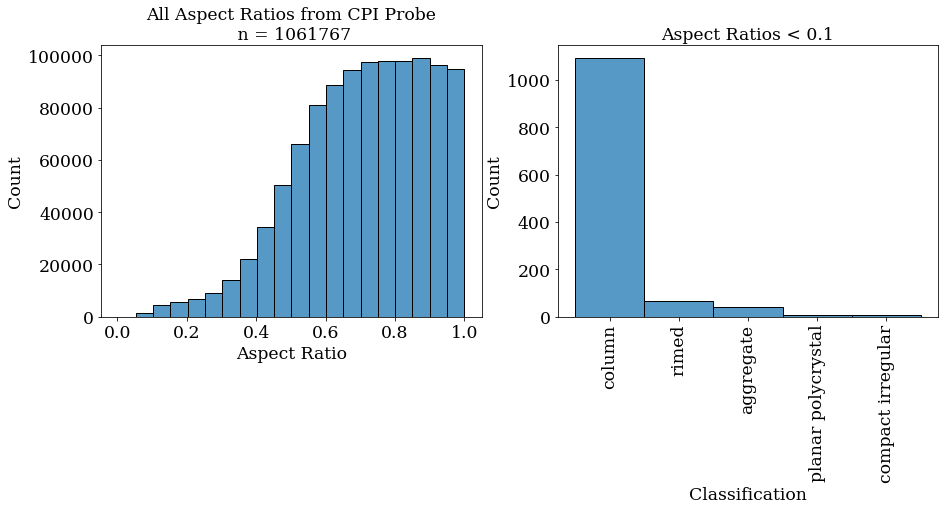

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot a histogram of aspect ratios from all particle types
sns.histplot(c.df_CPI['Aspect Ratio'], bins=20, ax=axs[0]);
axs[0].set_title(f'All Aspect Ratios from CPI Probe\n n = {len(c.df_CPI)}')
c.df_CPI['Classification'] = np.where((c.df_CPI.Classification == 'compact_irreg'),'compact irregular',c.df_CPI.Classification)
c.df_CPI['Classification'] = np.where((c.df_CPI.Classification == 'agg'),'aggregate',c.df_CPI.Classification)
c.df_CPI['Classification'] = np.where((c.df_CPI.Classification == 'planar_polycrystal'),'planar polycrystal',c.df_CPI.Classification)

df_CPI_trunc = c.df_CPI[c.df_CPI['Aspect Ratio'] < 0.1].copy()
df_CPI_trunc['Classification'] = pd.Categorical(df_CPI_trunc['Classification'], ['column', 'rimed', 'aggregate', 'planar polycrystal', 'compact irregular'])

sns.histplot(data=df_CPI_trunc,
             x='Classification',
             ax=axs[1]);
axs[1].set_title('Aspect Ratios < 0.1')
plt.xticks(rotation=90);

plt.savefig(
    "../plots/aspect_ratios_extreme_subplot.png",
    dpi=300,
    bbox_inches="tight",
)

In [20]:
p = campaign_plots.Plot(c.df_CPI)

<Figure size 360x360 with 0 Axes>

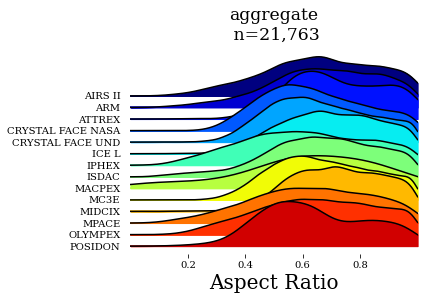

<Figure size 360x360 with 0 Axes>

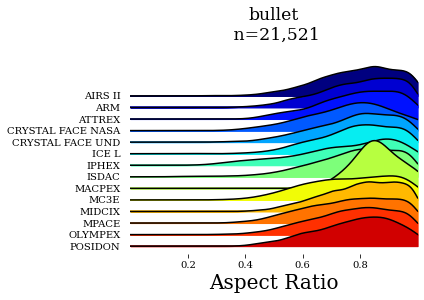

<Figure size 360x360 with 0 Axes>

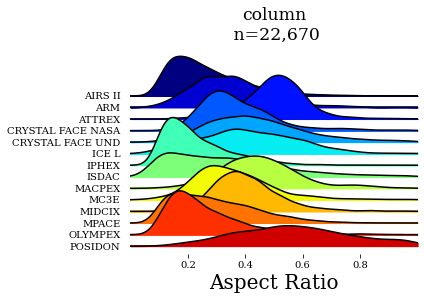

<Figure size 360x360 with 0 Axes>

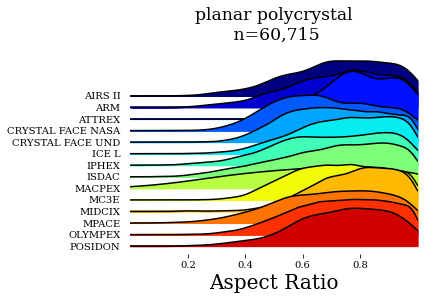

<Figure size 360x360 with 0 Axes>

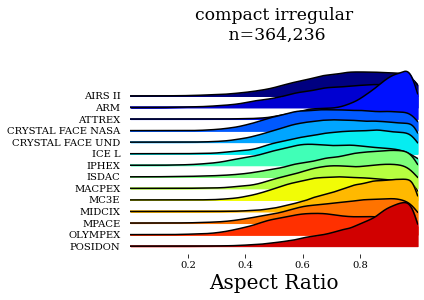

In [55]:
p.part_type_ridgeplots(var="Aspect Ratio")

<Figure size 360x360 with 0 Axes>

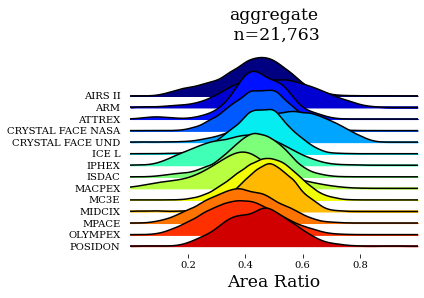

<Figure size 360x360 with 0 Axes>

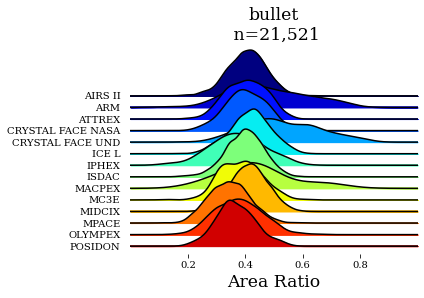

<Figure size 360x360 with 0 Axes>

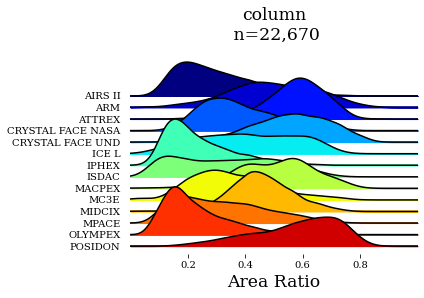

<Figure size 360x360 with 0 Axes>

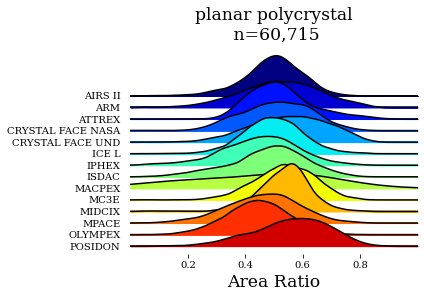

<Figure size 360x360 with 0 Axes>

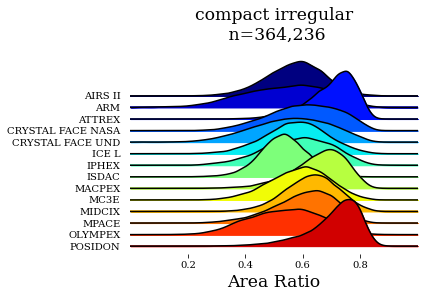

In [54]:
p.part_type_ridgeplots(var="Area Ratio")

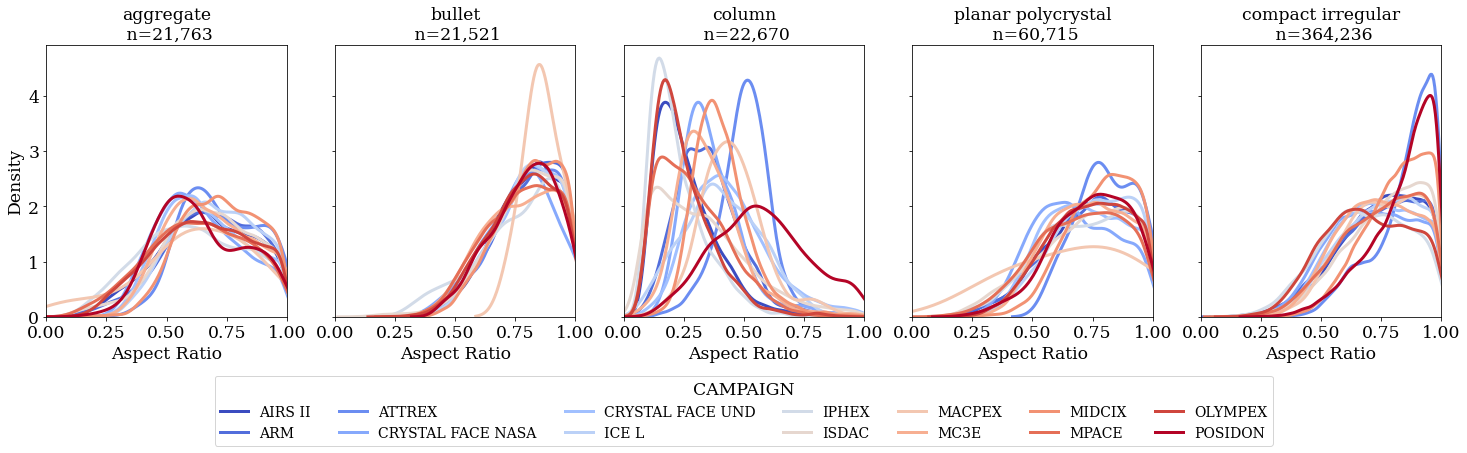

In [56]:
p.part_type_subplots(var="Aspect Ratio")

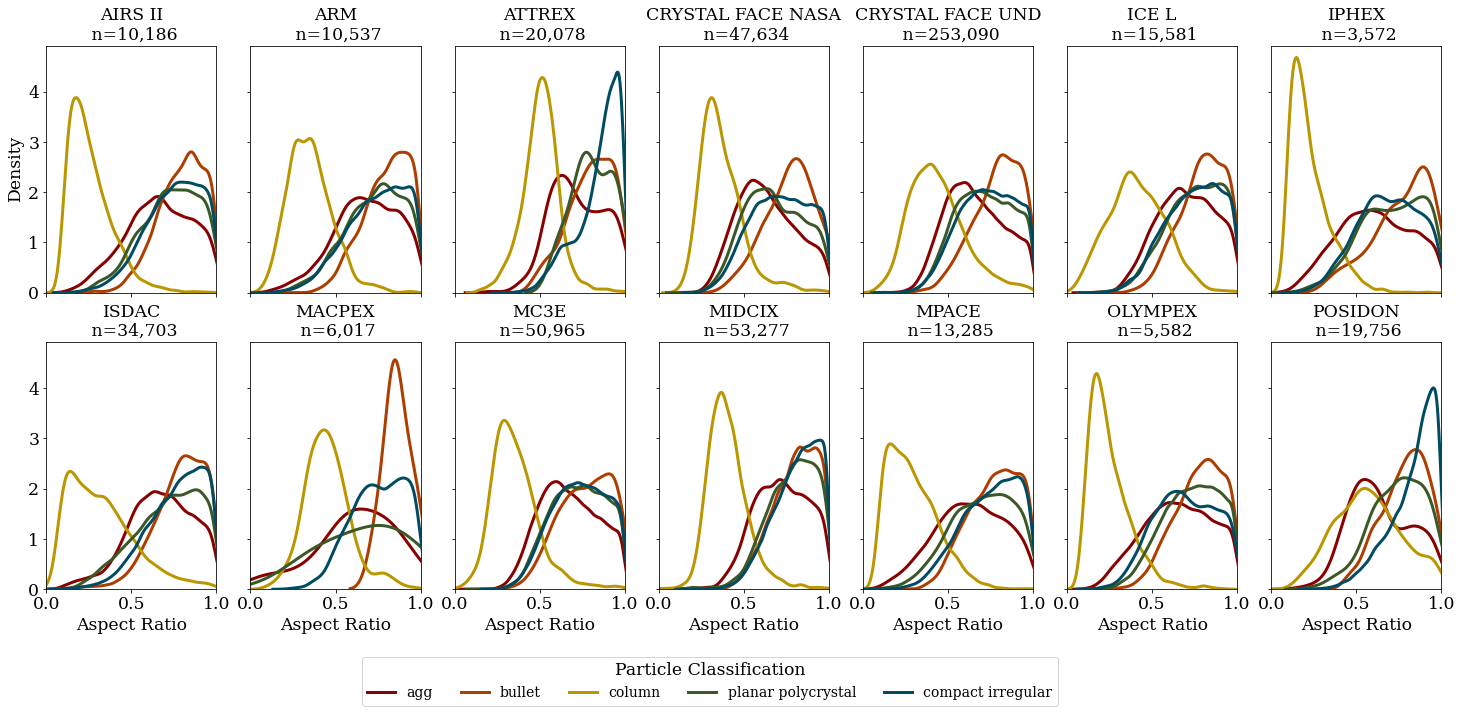

In [57]:
p.campaign_subplots(var="Aspect Ratio")

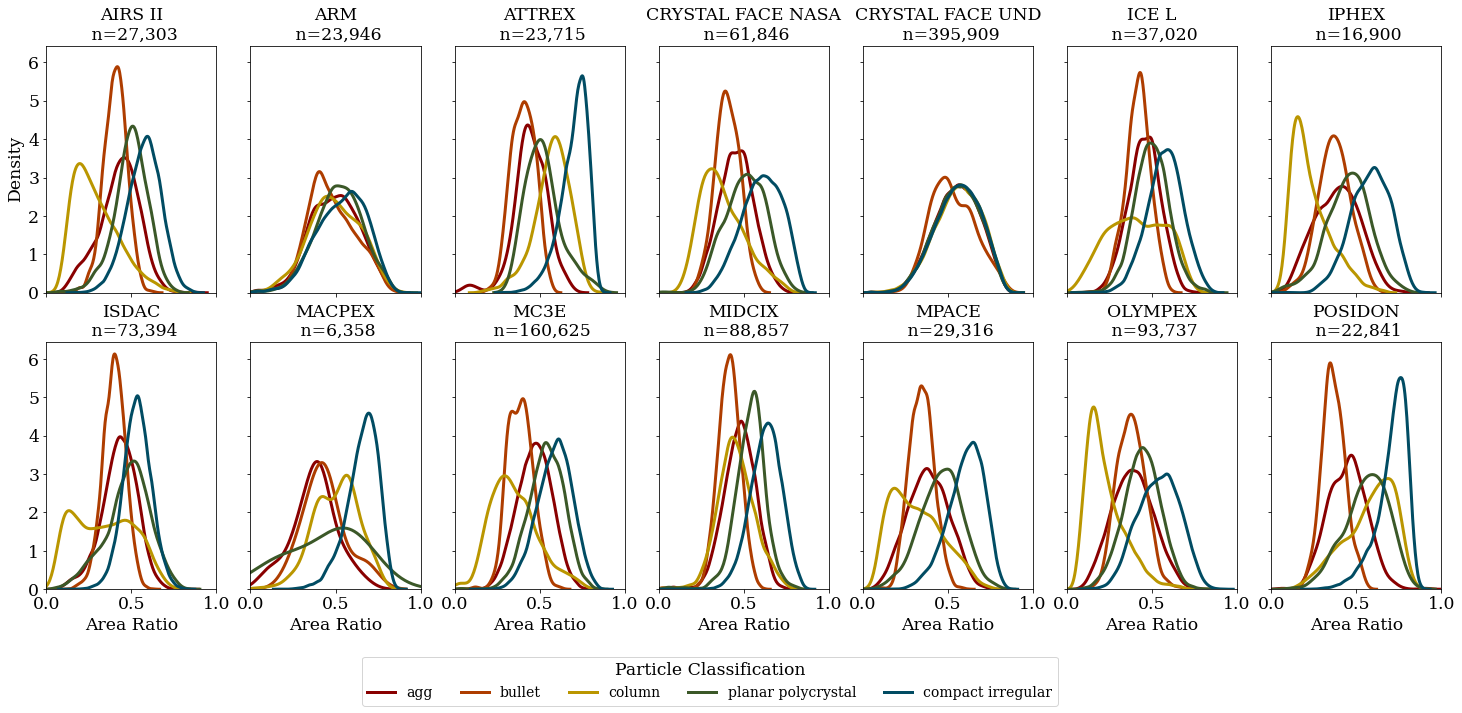

In [7]:
p.campaign_subplots(var="Area Ratio")

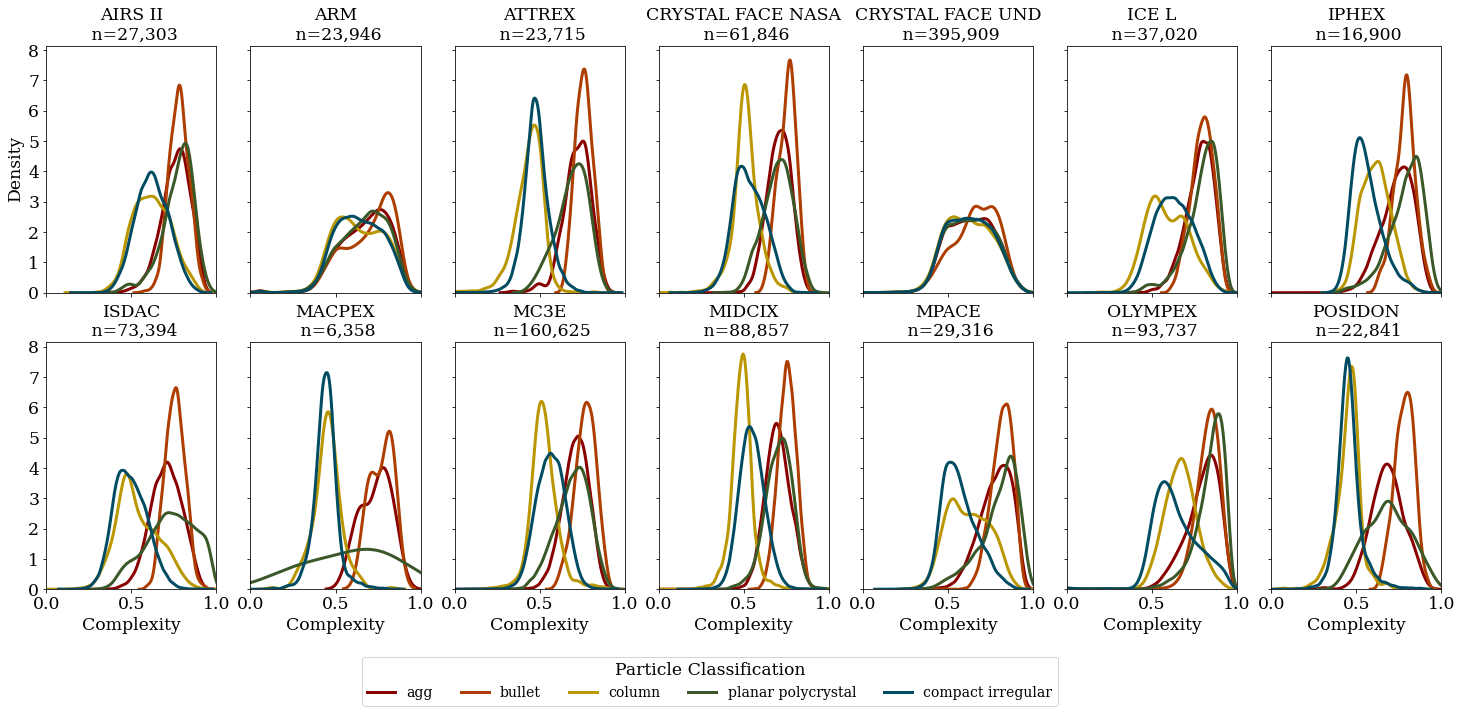

In [8]:
p.campaign_subplots(var="Complexity")

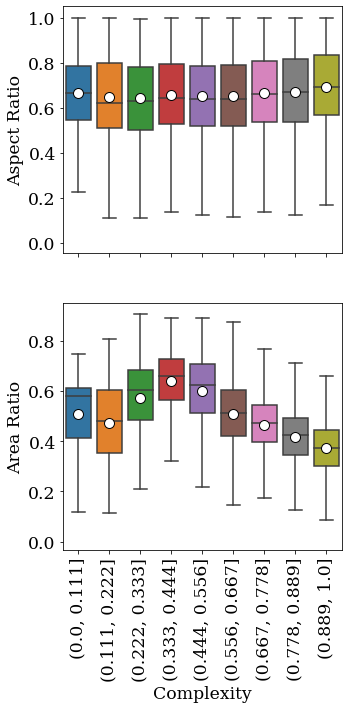

In [27]:
p.complexity_area_ratio(part_type='agg')

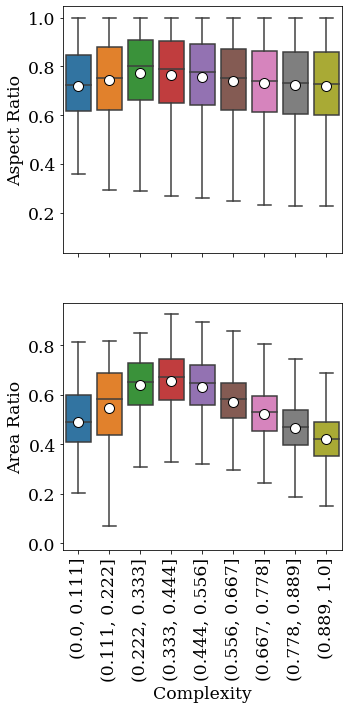

In [26]:
p.complexity_area_ratio(part_type='compact_irreg')